In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading and Understanding Data**

In [163]:
column_names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']

#Reading data
train_data = pd.read_csv("train_data.txt", sep=':::', header=None,  names=column_names, engine='python')
test_data = pd.read_csv("test_data.txt", sep=':::', header=None, names=['ID', 'TITLE', 'DESCRIPTION', 'GENRE'], engine='python')
test_solution_data = pd.read_csv("test_data_solution.txt", sep=':::', header=None, names=column_names, engine='python')

In [164]:
#Displaying the first few 5 rows of dataset
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [165]:
test_data.head()

,ID,TITLE,DESCRIPTION,GENRE
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [166]:
test_solution_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [167]:
#Checking shape of dataset
train_data.shape

(9560, 4)

In [168]:
test_data.shape

(29466, 4)

In [169]:
#Information of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9560 non-null   int64 
 1   TITLE        9560 non-null   object
 2   GENRE        9560 non-null   object
 3   DESCRIPTION  9560 non-null   object
dtypes: int64(1), object(3)
memory usage: 298.9+ KB


In [170]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29466 entries, 0 to 29465
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           29466 non-null  int64  
 1   TITLE        29466 non-null  object 
 2   DESCRIPTION  29465 non-null  object 
 3   GENRE        0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 920.9+ KB


In [171]:
#Finding missing values
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [172]:
test_data.isnull().sum()

ID                 0
TITLE              0
DESCRIPTION        1
GENRE          29466
dtype: int64

In [173]:
#Filling missing values
test_data.fillna(value=0, inplace=True)

In [174]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
GENRE          0
dtype: int64

In [175]:
#Finding duplicate values
train_data.duplicated().sum()

0

In [176]:
test_data.duplicated().sum()

0

**Exploratory Data Analysis**

In [177]:
#Examining how instances are distributed among different classes in the dataset.
#Count of different genres of movies
train_data['GENRE'].value_counts()

 drama           2365
 documentary     2307
 comedy          1308
 short            897
 horror           379
 thriller         313
 action           236
 western          194
 reality-tv       159
 family           138
 music            130
 adventure        129
 romance          114
 sci-fi           114
 adult            114
 animation         85
 sport             78
 crime             74
 talk-show         71
 fantasy           65
 mystery           56
 musical           52
 biography         47
 history           45
 game-show         37
 news              31
 war               22
Name: GENRE, dtype: int64

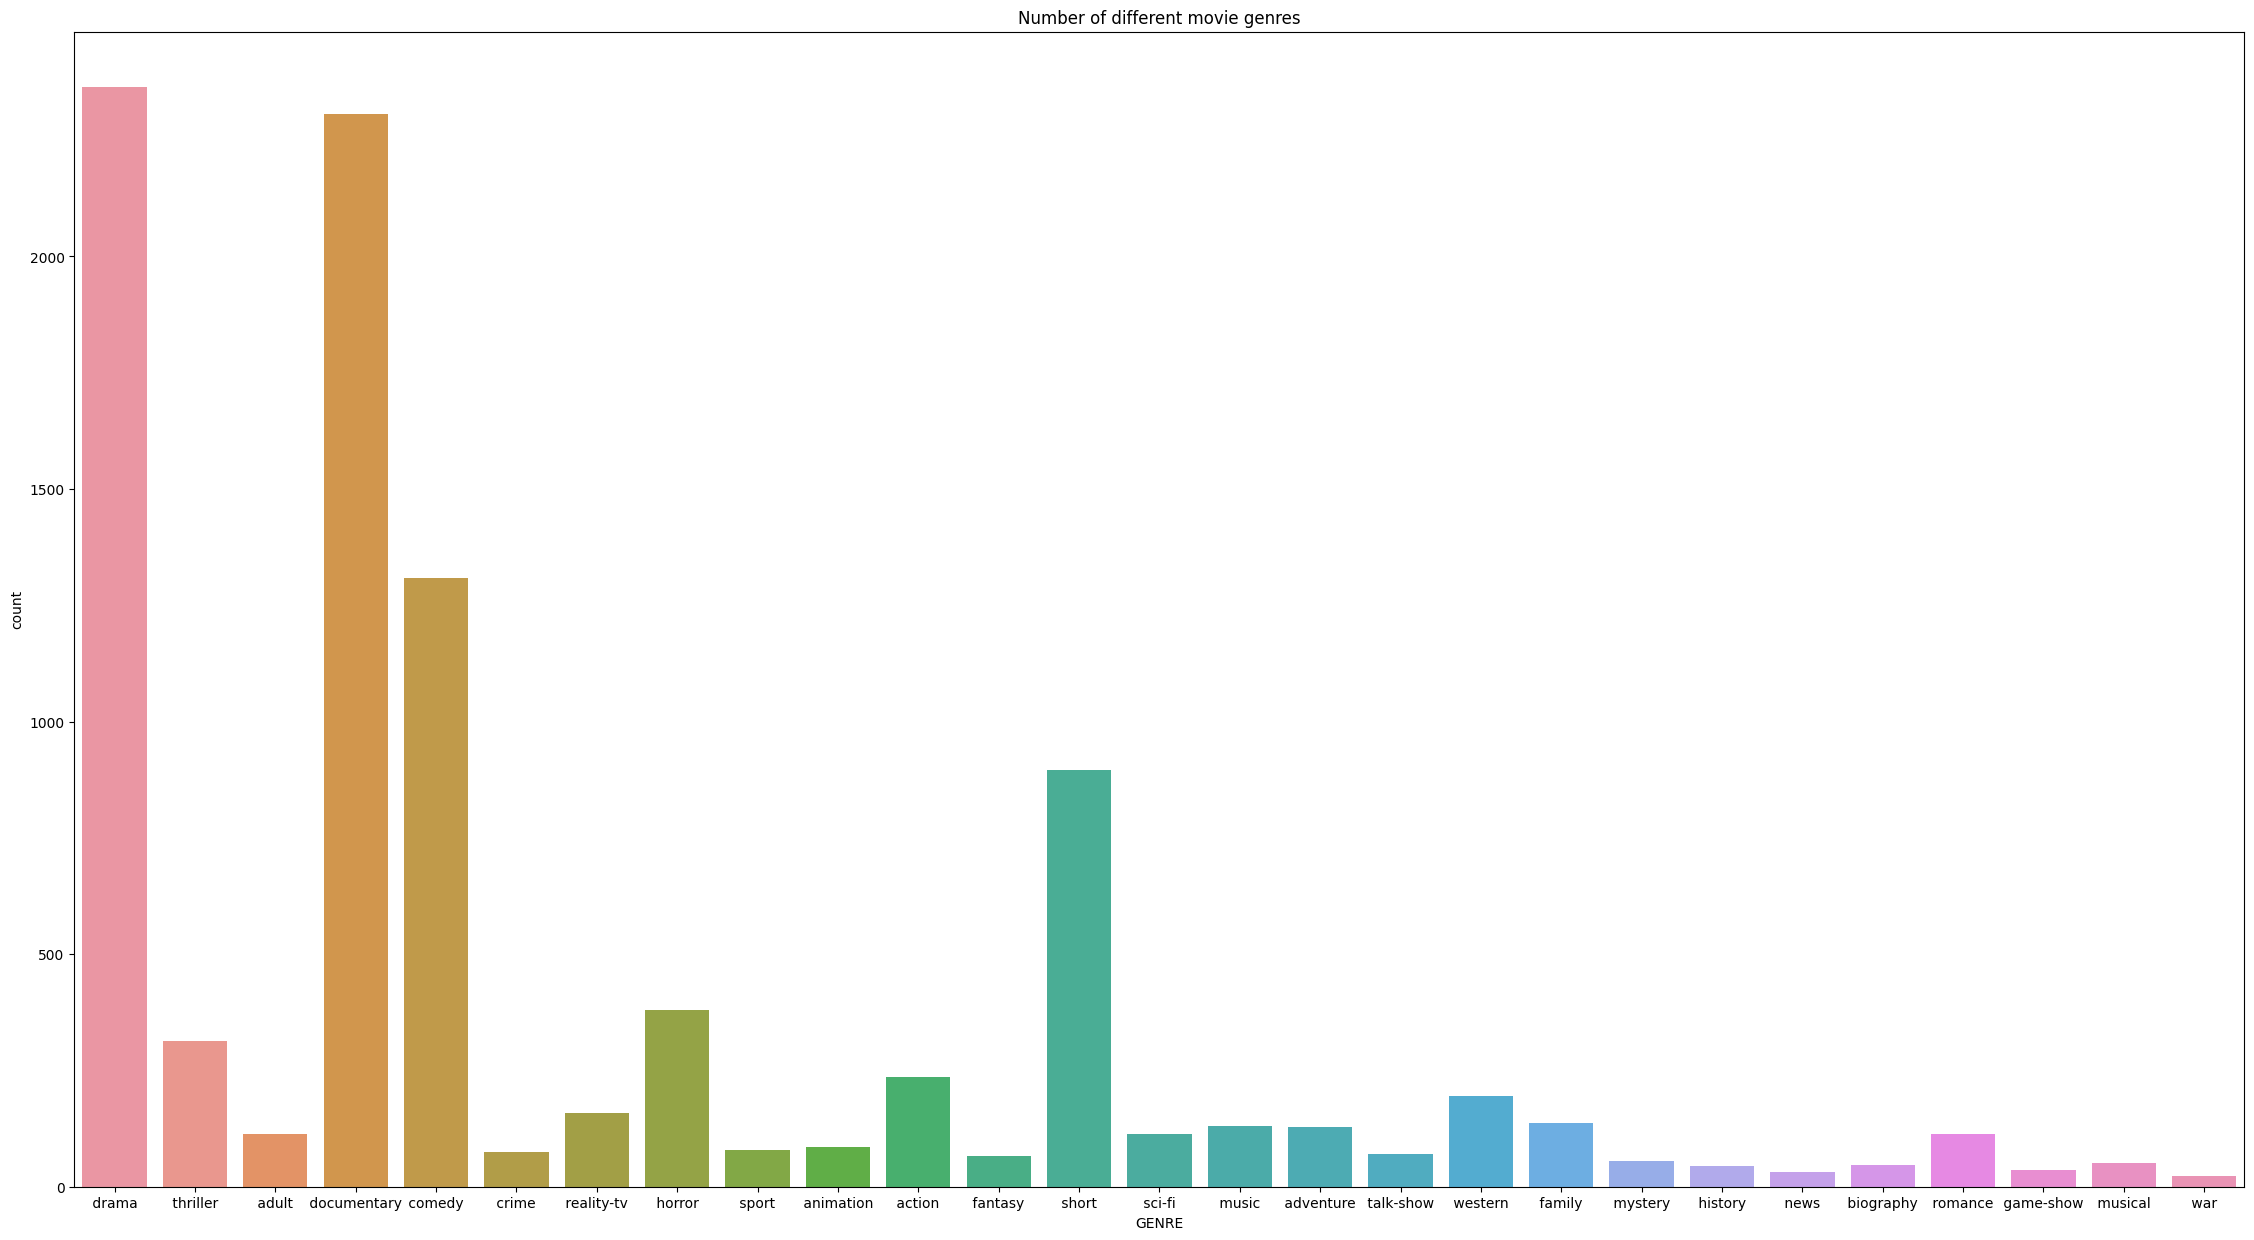

In [178]:
#Visualizing through seaborn countplot
plt.figure(figsize=(28,15))
sns.countplot(x='GENRE', data=train_data)
plt.title('Number of different movie genres')
plt.show()

In [179]:
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].astype(str)

**Training and Testing**

In [180]:
#Text Vectorization using Tfidf
#to convert a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
from sklearn.feature_extraction.text import TfidfVectorizer

In [181]:
# Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(train_data['DESCRIPTION']).toarray()
X_test_tfidf = tfidf.transform(test_data['DESCRIPTION']).toarray()

In [183]:
#Encoding labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['GENRE'])
y_test_encoded = label_encoder.transform(test_solution_data['GENRE'])

In [184]:
#train-test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

**Model Building**

In [185]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [186]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes:", accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes: 0.29497907949790797


In [187]:
description = ["A gripping thriller about a detective trying to solve a series of mysterious murders in a small town."]
input_data = tfidf.transform(description)

# Convert sparse input to dense format
input_data = input_data.toarray()
predicted_label = gnb.predict(input_data)

#convert a numeric label back to its original categorical representation.
predicted_genre = label_encoder.inverse_transform(predicted_label)[0]
print("The predicted genre is: ", predicted_genre)

The predicted genre is:   action 


In [188]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.5235355648535565


In [190]:
description = ["A family inherits an old mansion with a dark history, uncovering hidden secrets."]
input_data = tfidf.transform(description)

# Convert sparse input to dense format
input_data = input_data.toarray()
predicted_label = gnb.predict(input_data)

#convert a numeric label back to its original categorical representation.
predicted_genre = label_encoder.inverse_transform(predicted_label)[0]
print("The predicted genre is: ", predicted_genre)

The predicted genre is:   adventure 


In [191]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [192]:
print("Accuracy of Support Vector Machine:", accuracy_score(y_test, y_pred))

Accuracy of Support Vector Machine: 0.5083682008368201


In [193]:
description = ["A young woman discovers an ancient secret that changes the course of her life."]
input_data = tfidf.transform(description)

# Convert sparse input to dense format
input_data = input_data.toarray()
predicted_label = gnb.predict(input_data)

#convert a numeric label back to its original categorical representation.
predicted_genre = label_encoder.inverse_transform(predicted_label)[0]
print("The predicted genre is: ", predicted_genre)

The predicted genre is:   romance 
